In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df=pd.read_csv('lr_dataset1.csv',index_col="House ID")
x = df[["House Area", "Number of rooms"]].values
y = df["Price"].values
x = np.insert(x, 0, 1, axis=1)
df

,House Area,Number of rooms,Price
House ID,,,
1,6274,8,2100
2,6689,5,2200
3,4276,8,1400
4,5130,9,1700
5,6035,6,2000
6,2946,1,1000
7,4727,10,1600
8,6873,7,2300
9,3911,4,1300


In [68]:
m = np.linalg.inv(x.T @ x) @ x.T @ y
print(m)

[-8.40626364  0.33333975  0.89755768]


In [ ]:
area=float(input("Area of the house : "))
rooms=int(input("Number of rooms: "))
price = m[0] + m[1]*area + m[2]*rooms 
print(f"Price of the house : ${price:.2f}")

Price of the house is : $2083.48


In [70]:
error = abs(y - (m[0]*x[:,0] + m[1]*x[:,1]))
print(np.round(error, 2))

[17.03 21.3  16.95  1.63  3.3  26.39 32.71 17.36  4.71 12.04 11.3   5.71
 12.05  4.36 23.69 13.62]


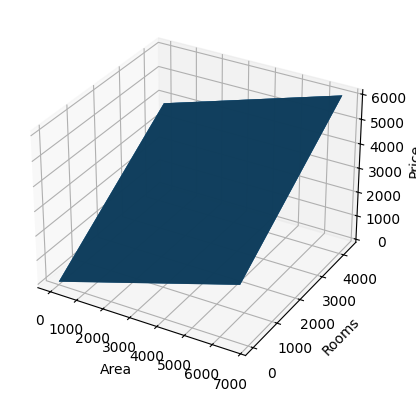

In [72]:
Area, Rooms = np.meshgrid(x[1], x[2])
price_grid = m[0] + m[1]*Area + m[2]*Rooms

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Area, Rooms, price_grid, alpha=0.7)
ax.set_xlabel("Area")       
ax.set_ylabel("Rooms")
ax.set_zlabel("Price")
plt.show()
